Data Link 
<a> https://www.kaggle.com/datasets/moltean/fruits/versions/22 </a>

<h1> Fruits Classification </h1>
<ul> 
    <li> Explore Dataset </li>
    <li> Visualization </li>
    <li> Data Preprocessing </li>
    <li> Modeling Using CNN </li>
</ul>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
import PIL
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator

### Explore Dataset

In [2]:
for dirname, _, filenames in os.walk('/archive/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train_path = "archive/fruits-360/Training/"
test_path = "archive/fruits-360/Validation"

In [6]:
# pathlib module provides an object API for working with files and directories
train_dir = pathlib.Path(train_path)
test_dir = pathlib.Path(test_path)

In [5]:
# Number of training examples
image_count = len(list(train_dir.glob('*/*.jpg')))
image_count

35133

In [7]:
# Number of test examples
image_count2 = len(list(test_dir.glob('*/*.jpg')))
image_count2

11804

### Visualization

In [15]:
fruits = list(train_dir.glob("Apple Golden 1/*.jpg"))


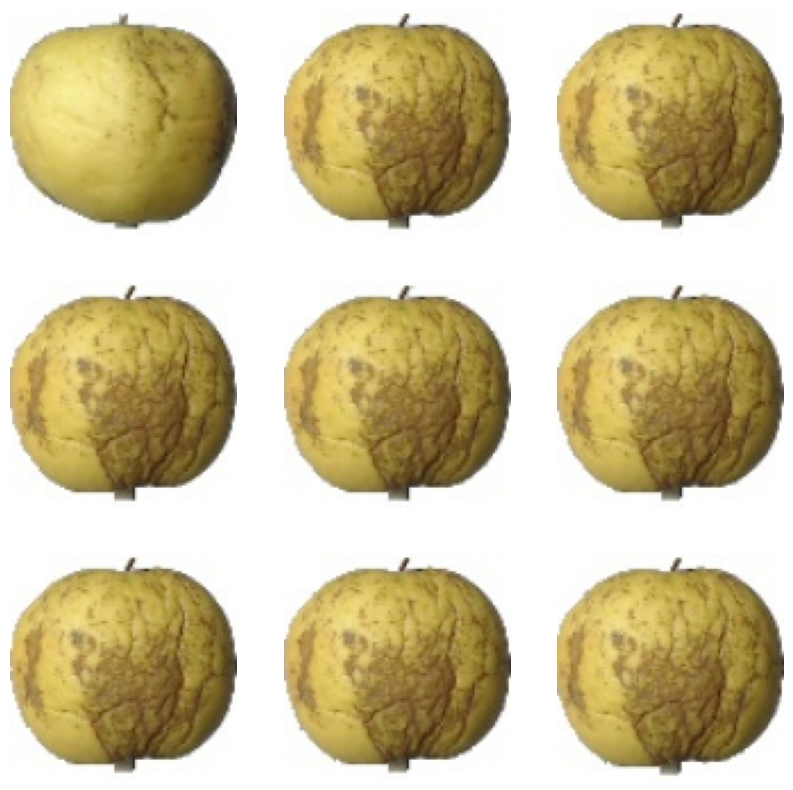

In [16]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [17]:
fruits = list(train_dir.glob("Apple Red 3/*.jpg"))

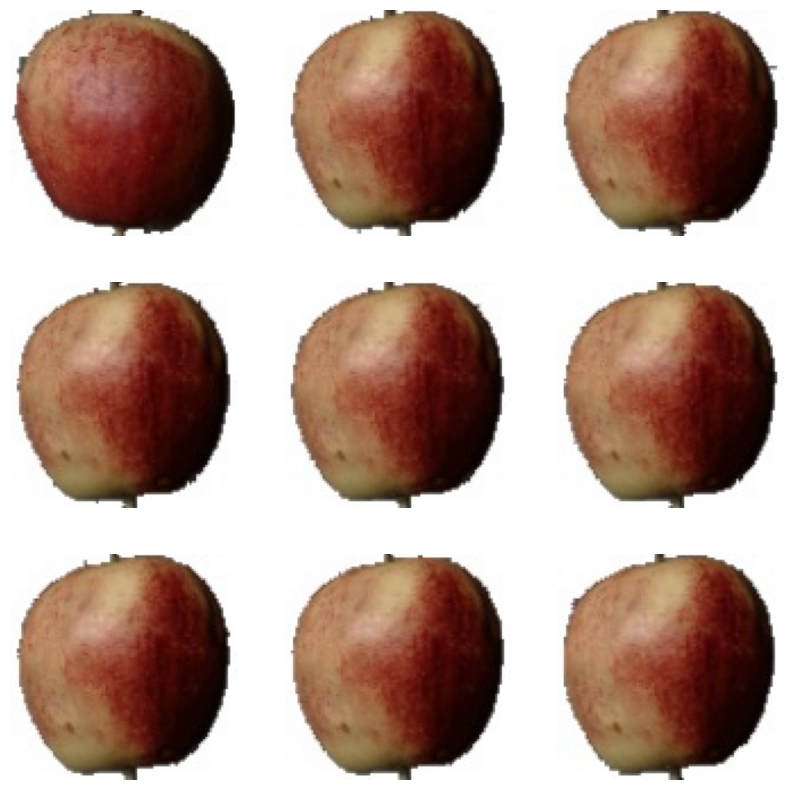

In [18]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

### Data Preprocessing

In [19]:
batch_size = 128
img_height = 100
img_width = 100

In [20]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 35133 files belonging to 70 classes.
Using 28107 files for training.


In [21]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 35133 files belonging to 70 classes.
Using 7026 files for validation.


In [22]:
class_names = train_data.class_names
num_classes = len(class_names)

In [23]:
# Normalize the data
datagen = ImageDataGenerator(rescale = 1./255)
# and generates batches of normalized data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size = 128,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height,img_width),
    batch_size = 128, 
    class_mode='categorical' 
)

Found 35133 images belonging to 70 classes.
Found 11804 images belonging to 70 classes.


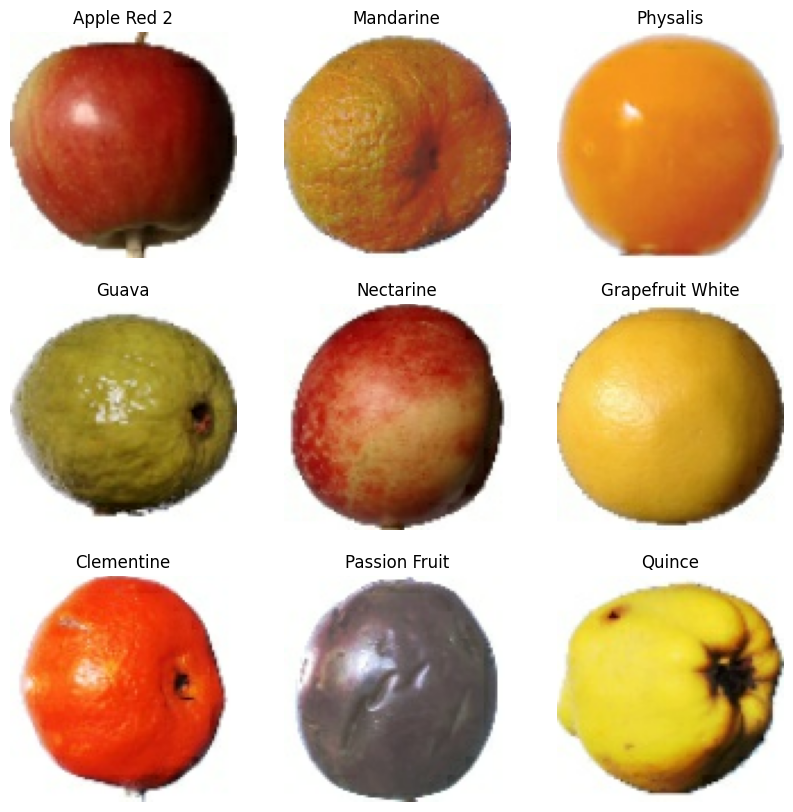

In [24]:
plt.figure(figsize=(10, 10))

#to take 1 batch
for images, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

### Modeling Using CNN

In [25]:
model = tf.keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),

    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2),
     keras.layers.Dropout(0.5),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes,  activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
  train_generator,
  steps_per_epoch=15,  
  validation_steps=20,
  validation_data=test_generator,
  epochs=60,
  verbose=1
)

Epoch 1/60
15/15 [==============================] - 161s 11s/step - loss: 4.1683 - accuracy: 0.0380 - val_loss: 4.0008 - val_accuracy: 0.0297
Epoch 2/60
15/15 [==============================] - 133s 9s/step - loss: 3.6990 - accuracy: 0.0901 - val_loss: 3.1802 - val_accuracy: 0.1918
Epoch 3/60
15/15 [==============================] - 112s 8s/step - loss: 2.6774 - accuracy: 0.2698 - val_loss: 2.2428 - val_accuracy: 0.3938
Epoch 4/60
15/15 [==============================] - 94s 6s/step - loss: 1.8429 - accuracy: 0.4859 - val_loss: 1.5793 - val_accuracy: 0.5418
Epoch 5/60
15/15 [==============================] - 80s 6s/step - loss: 1.2850 - accuracy: 0.6359 - val_loss: 1.2610 - val_accuracy: 0.6313
Epoch 6/60
15/15 [==============================] - 72s 5s/step - loss: 0.9510 - accuracy: 0.7193 - val_loss: 1.1054 - val_accuracy: 0.6918
Epoch 7/60
15/15 [==============================] - 72s 5s/step - loss: 0.7366 - accuracy: 0.7771 - val_loss: 0.9301 - val_accuracy: 0.7488
Epoch 8/60
15/15

Epoch 59/60
15/15 [==============================] - 14s 828ms/step - loss: 0.0219 - accuracy: 0.9943 - val_loss: 0.1164 - val_accuracy: 0.9680
Epoch 60/60
15/15 [==============================] - 13s 885ms/step - loss: 0.0227 - accuracy: 0.9922 - val_loss: 0.1502 - val_accuracy: 0.9598


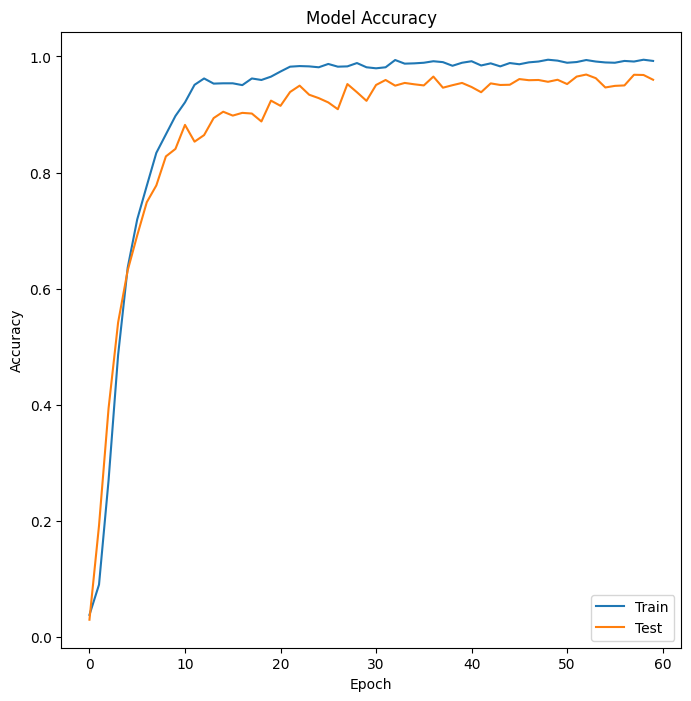

In [27]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

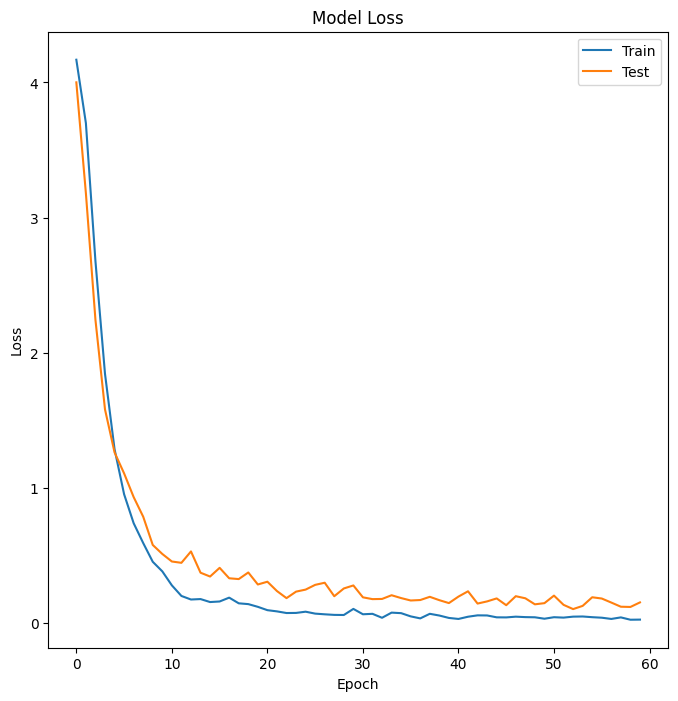

In [28]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [29]:
loss, acc = model.evaluate(test_generator)

print('Loss:', loss)
print('Accuracy:', acc)

93/93 [==============================] - 16s 169ms/step - loss: 0.1360 - accuracy: 0.9656
Loss: 0.13603311777114868
Accuracy: 0.9656049013137817
